### Used car price predictor for Mercedes Benz

This project focuses on predicting the price of a used car by utilizing specific features of each vehicle.

### Load the dataset

This [dataset](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?select=merc.csv) is in CSV format and located in the `data` folder. The following directory path will safely import the dataset into this current `analysis` jupyter notebook: `../data/merc.csv`

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PATH = "../data/merc.csv"

# Use this variable as the random state for all data splits and model operations.
RANDOM_STATE = 42

df = pd.read_csv(PATH)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


### Explore the dataset

To understand the dataset, print out the following:
- shape of the dataset
- summary statistics for each numerical feature (type of each columns and non-null counts)
- the amount of unqiue values for each categorical feature
- the amount of missing (NaN) values for each feature

In [84]:
print(f"Shape of the dataset: {df.shape}")
print(f"----------------------------------------------------------------------------")

print(f"Each column's data type and the amount of non-null datapoints of the dataset:")
print(df.info())
print(f"----------------------------------------------------------------------------")

print("Each of numerical feature's statistics")
print(df.describe())
print(f"----------------------------------------------------------------------------")

print(f"Each of categorical feature's unqiue values")
categorical_feature = ["model", "transmission", "fuelType"]
for feature in categorical_feature:
    print(f"{df[feature].value_counts()}")
    if feature != "fuelType":
        print(f"--------------------------------")
print(f"----------------------------------------------------------------------------")

print(f"The amount of NaN values from each column")
print(df.isnull().sum())

Shape of the dataset: (13119, 9)
----------------------------------------------------------------------------
Each column's data type and the amount of non-null datapoints of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB
None
----------------------------------------------------------------------------
Each of numerical feature's statistics
               year          price        mile

### Rename certain column names

Convert camelCase columns into snake_case for consistency.
- rename `fuelType` to `fuel_type`
- rename `engineSize` to `engine_size`

In [85]:
df = df.rename(columns={"fuelType": "fuel_type", "engineSize": "engine_size"})
for column in [df.columns[5], df.columns[8]]:
    print(column)

fuel_type
engine_size


### Remove leading whitespace from the `model` feature

Each value in the `model` column contains a leading whitespace. Remove it with using `.str.strip()` to clean the dataset.

In [86]:
model_slk_string = df['model'].unique()[0]
print(f"{model_slk_string}")
print(f"string length: {len(model_slk_string)}")

df['model'] = df['model'].str.strip()

model_slk_new_string = df['model'].unique()[0]
print(f"{model_slk_new_string}")
print(f"new string length: {len(model_slk_new_string)}")

 SLK
string length: 4
SLK
new string length: 3


### Exclude rare datapoints

The original dataset contains rare categorical values from each feature. Dropping rows that contain these rare values can help improve model accuracy, as these examples contribute little to the overall statistical patterns and may introduce noise. Since these rare categories represent the minority part of the data, removing them will not significantly harm the model's performance. Therefore, exclude rows that satisfy any of the following conditions:

- `model`: "CLK", "CLC Class", "R Class", "180", "230", "220", "200"
- `transmission`: "Other"
- `fuelType`: "Other"

In [87]:
previous_length = len(df)



first_condition = df["model"].isin(["CLK", "CLC Class", "R Class", "180", "230", "220", "200"])
count_first_condition = len(df[first_condition])
display(df[first_condition])
print(f"Number of the first condition: {count_first_condition}")

second_condition = df["transmission"] == "Other"
count_second_condition = len(df[second_condition])
display(df[second_condition])
print(f"Number of the second condition: {count_second_condition}")

third_condition = df["fuel_type"] == "Other"
count_third_condition = len(df[third_condition])
display(df[third_condition])
print(f"Number of the thrid condition: {count_third_condition}")

print()

# "double_other" is a variable that satisfies two conditions (see the next cell)
double_other = df[
    (df["transmission"] == "Other") &
    (df["fuel_type"] == "Other")
]

df = df[~
   (
    (df["model"].isin(["CLK", "CLC Class", "R Class", "180", "230", "220", "200"])) |
    (df["transmission"] == "Other") |
    (df["fuel_type"] == "Other")
    )
]

new_length = len(df)

print(f"Number of rows that should be dropped: {count_first_condition + count_second_condition + count_third_condition}")
print(f"Number of rows that were actually dropped: {previous_length - new_length}")

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size
50,CLC Class,2010,5880,Automatic,40000,Petrol,300,34.0,1.8
9482,CLC Class,2010,4695,Automatic,85000,Petrol,305,35.8,1.6
10463,180,2014,10799,Manual,39240,Diesel,20,72.4,1.5
10894,CLC Class,2010,5975,Automatic,44662,Petrol,300,35.8,1.6
11140,CLK,2004,2995,Automatic,113000,Diesel,300,39.2,2.7
11184,CLK,2003,3376,Automatic,105000,Diesel,230,39.2,2.7
11273,R Class,2011,11999,Automatic,75857,Diesel,325,33.2,3.0
11347,230,2007,4500,Automatic,94000,Petrol,520,29.4,0.0
11383,CLK,2005,1995,Automatic,105000,Diesel,260,43.5,2.1
11420,CLK,2002,3790,Automatic,98000,Petrol,325,24.6,5.0


Number of the first condition: 16


,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size
9650,GLA Class,2016,18700,Other,30895,Other,125,56.5,0.0
12762,SLK,2015,12995,Other,39000,Diesel,150,56.5,2.1


Number of the second condition: 2


,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size
9650,GLA Class,2016,18700,Other,30895,Other,125,56.5,0.0
11740,GLE Class,2016,31990,Automatic,46000,Other,0,76.4,3.0
12095,C Class,2016,13850,Automatic,77814,Other,0,134.5,2.0
12184,C Class,2017,17400,Automatic,52897,Other,0,134.5,2.0
12270,C Class,2017,16000,Automatic,54011,Other,0,134.5,2.0
12389,C Class,2015,15000,Automatic,53400,Other,0,134.5,2.0
12894,C Class,2020,40999,Automatic,400,Other,135,217.3,2.0


Number of the thrid condition: 7

Number of rows that should be dropped: 25
Number of rows that were actually dropped: 24


### Why were only 24 rows removed instead of 25?

Note that only 24 rows were removed from the original dataset even though the sum of rows that satisfying each individual condition is 25.

This is because there was a single row that satisfies two conditions: contains "Other" for both `transmission` and `fuelType` columns. 

This was stored on the variable: `double_other`, from the previous cell before removing the rare examples.

In [88]:
double_other

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size
9650,GLA Class,2016,18700,Other,30895,Other,125,56.5,0.0


### Visualize categorical features

Utilize the bar plot to visualize the count of each categorical feature. 
- The `model` feature uses a horizontal bar since some of its unique values have long string lengths, which may not display well on the vertical axis.
- The actual count value will be displayed on top of each bar to clearly show the distribution of each cateogrical feature.

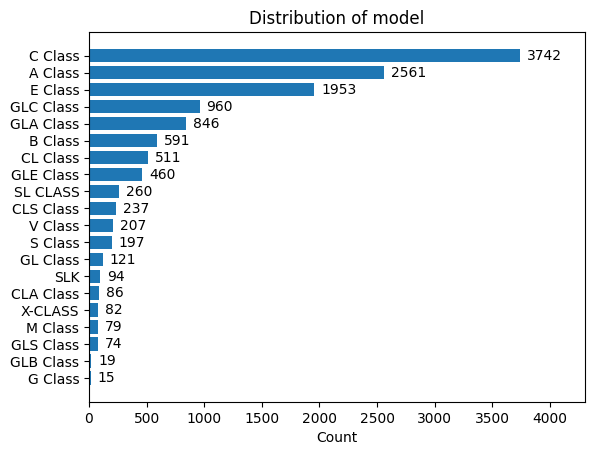

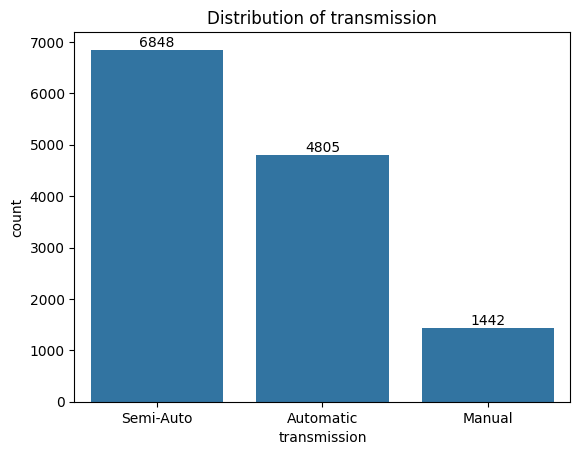

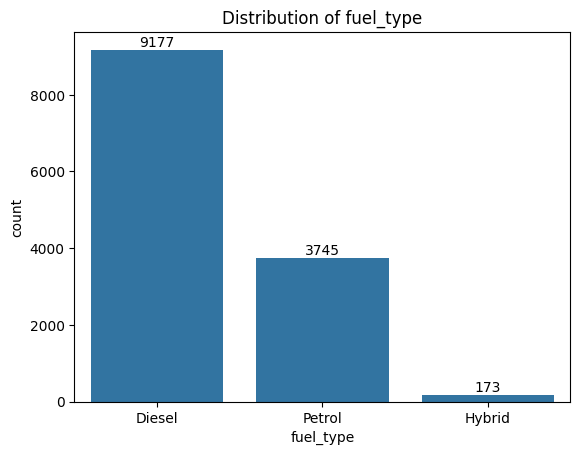

In [89]:
categorical_features = df[["model", "transmission", "fuel_type"]]

for categorical in categorical_features.columns:

    if categorical == "model":

        """
        Certain "model" feature's value had a long name (ex: GLC Class) so horizontal bar plot was needed.
        """

        counts = df[categorical].value_counts()

        model = counts.index
        y_pos = np.arange(len(counts.index))
        performance = counts.values

        fig, ax = plt.subplots()

        hbars = ax.barh(y_pos, performance, align='center')
        ax.set_yticks(y_pos, labels=model)
        ax.invert_yaxis()
        ax.set_xlabel('Count')

        ax.bar_label(hbars, padding=5)
        ax.set_xlim(0, max(counts.values) * 1.15)
        

    else:

        order = df[categorical].value_counts().index
        ax = sns.countplot(x=categorical, data=df, order=order)

        for container in ax.containers:
            ax.bar_label(container)
        
    plt.title(f"Distribution of {categorical}")
    plt.show()

### Visualize numerical features

Use the violin plot to visualize numerical features.

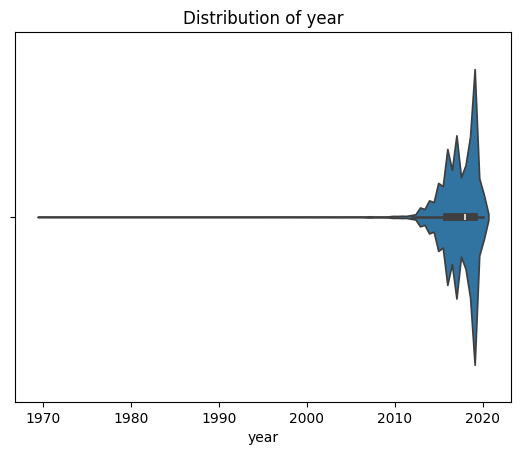

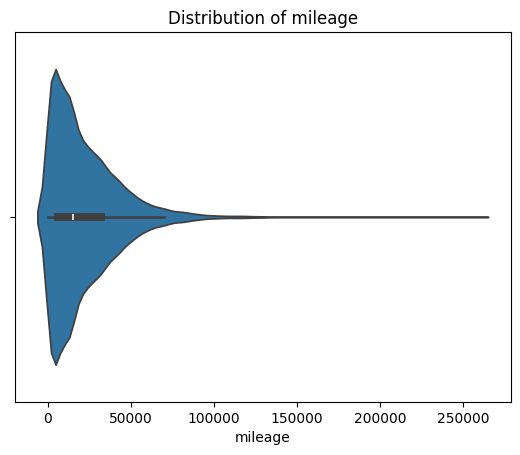

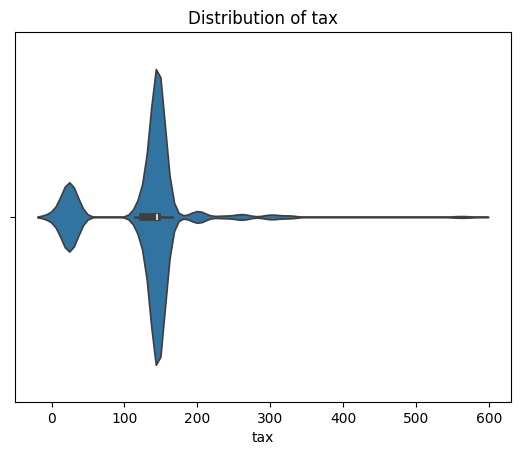

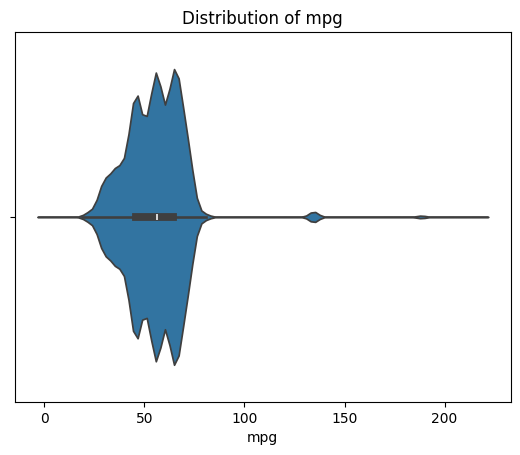

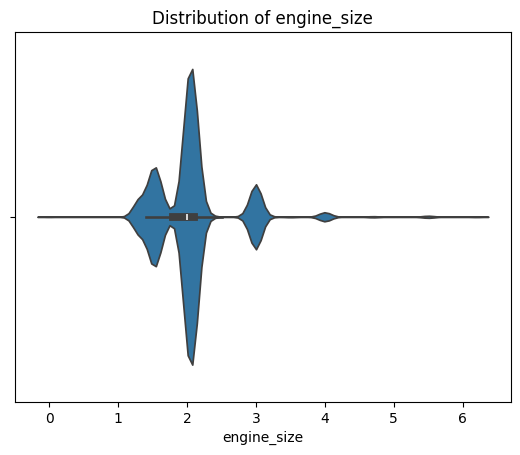

In [90]:
numerical_features = df[["year", "mileage", "tax", "mpg", "engine_size"]]

for numerical in numerical_features.columns:

    sns.violinplot(x=numerical, data=df)
    plt.title(f"Distribution of {numerical}")
    plt.show()

### Visualize the target

Since our target `price` is also a numerical variable, we use the violin plot to display its distribution.

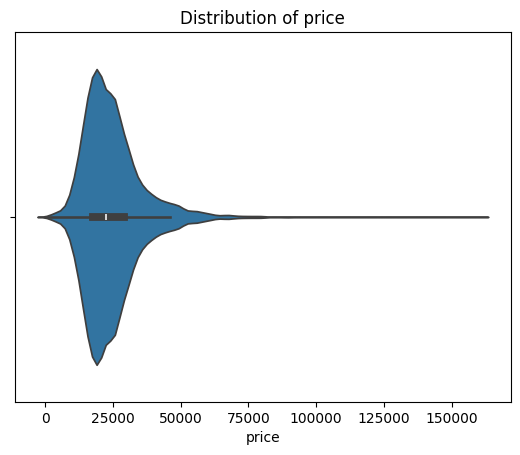

In [91]:
sns.violinplot(x="price", data=df)
plt.title("Distribution of price")
plt.show()

### Visualize the relationship of each feature and the target
- use a box plot for categorical features
- use a scatter plot for numerical features

In the box plot of `model` and `price`, swap the x and y axes for `model` column with long named values.

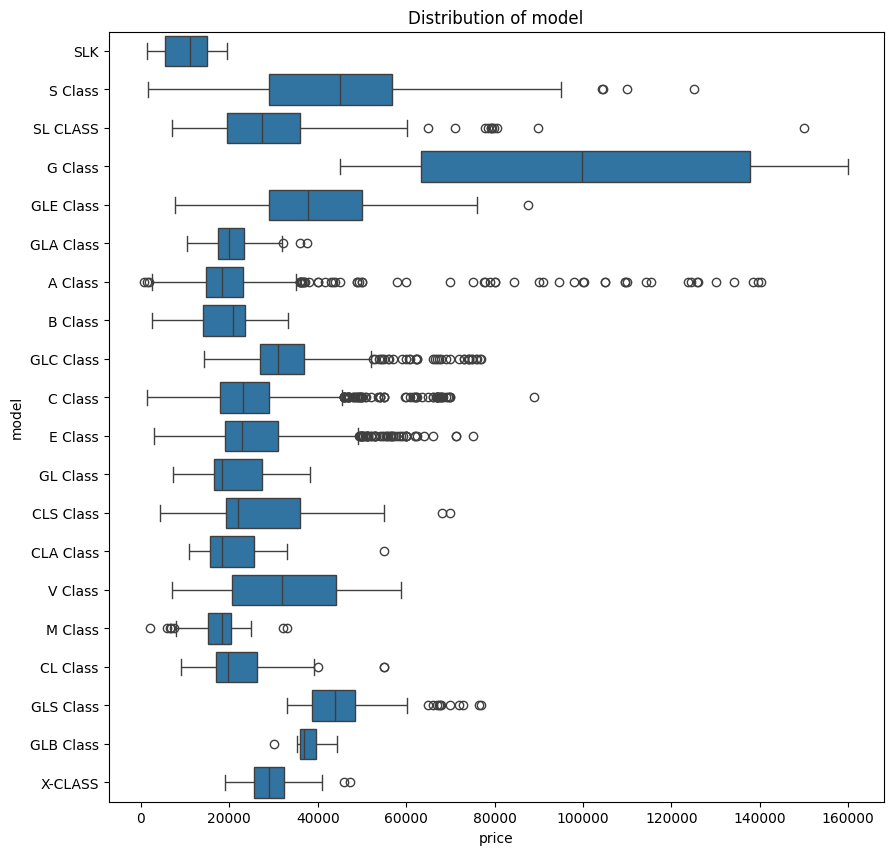

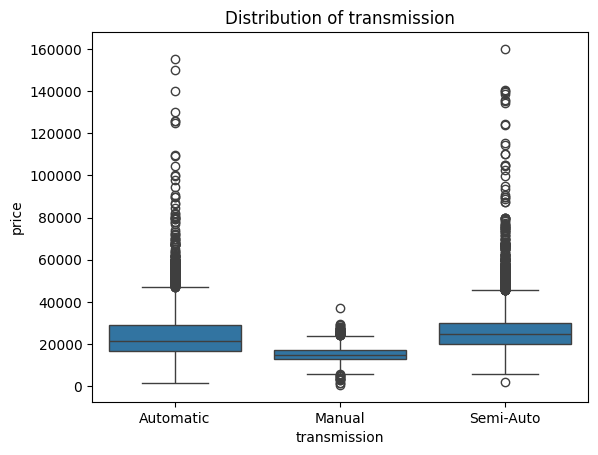

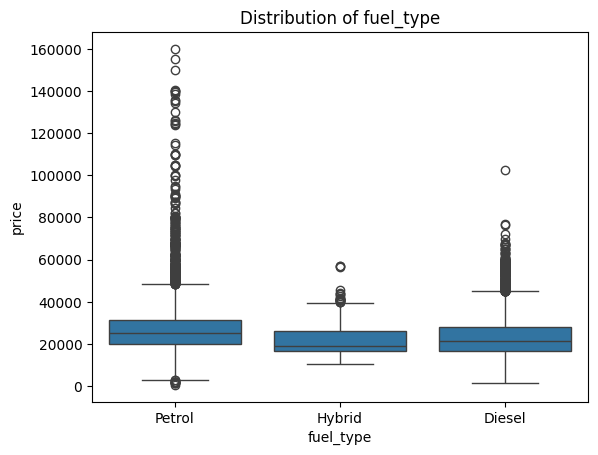

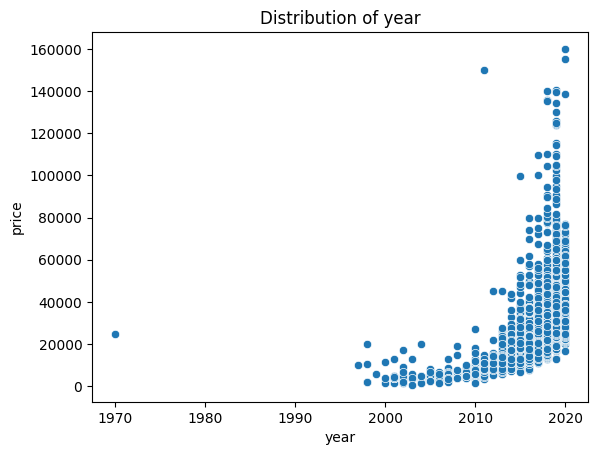

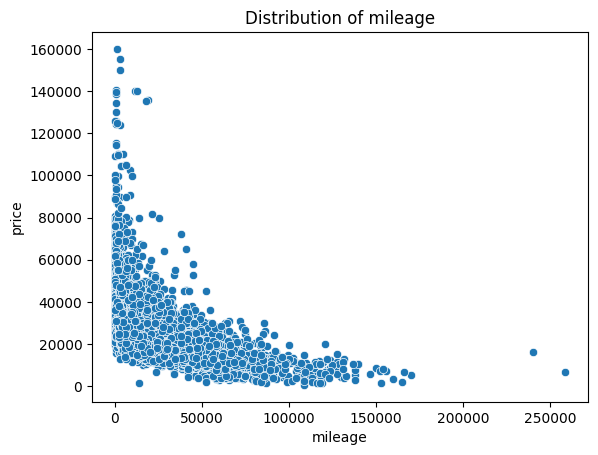

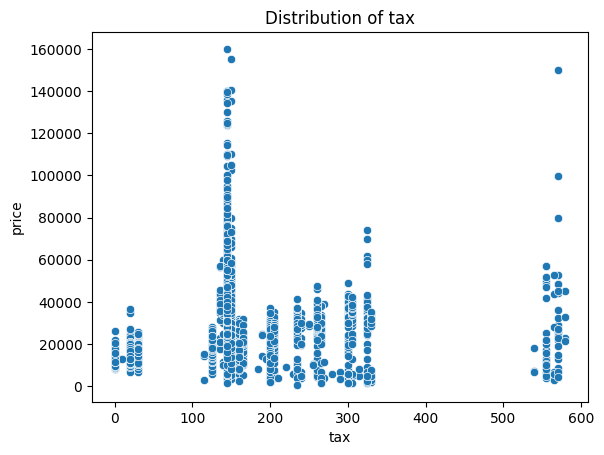

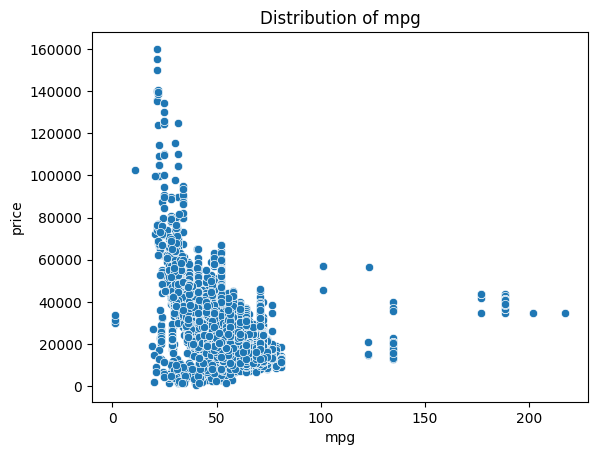

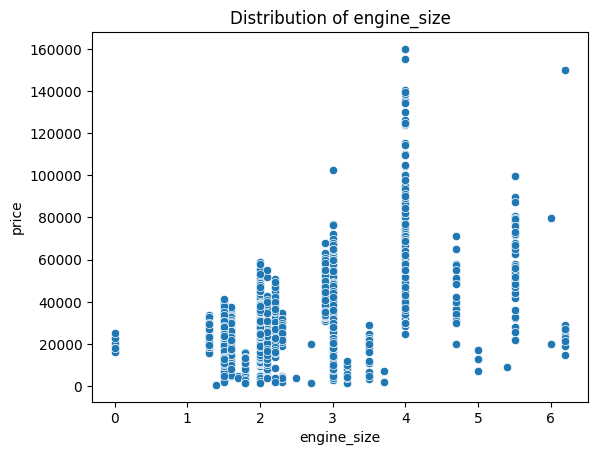

In [92]:
every_feature = df.drop(columns="price")
target = df["price"]


for category in categorical_features.columns:

    if category == "model":
        plt.figure(figsize=(10, 10))
        sns.boxplot(x=target.name, y=category, data=df)
    else:
        sns.boxplot(x=category, y=target.name, data=df)

    plt.title(f"Distribution of {category}")
    plt.show()

for category in numerical_features.columns:

    sns.scatterplot(x=category, y=target.name, data=df)
    plt.title(f"Distribution of {category}")
    plt.show()




# for feature in every_feature.columns:

#     if feature == 'model':
#         """
#         Only "model" feature switch the x and y axes (x as the target, y as the feature) because of some long lengthed values.
#         """
#         sns.scatterplot(x=target.name, y=feature, data=df)
#     else:
#         sns.scatterplot(x=feature, y=target.name, data=df)
    
#     plt.title(f"Distribution of {feature}")
#     plt.show()

### Simple Analysis of the dataset
- some of features are significantly skewed
- some of scatter plots show up vertical lines (crowded in a certain value)
- the majority of features have a non-linear relationship with the target
- the target variable is a continous data

### At this moment, try these algorithms to create a predictor.
- Option 1: Random Forest Algorithm (`sklearn`'s `RandomForestRegressor`)
- Option 2: XG Boost Algorithm (`xgboost`'s `XGBRegressor`)

### Split the dataset into train and cross-validation sets and one-hot encode the categorical features.

- the ratio of split is 80:20 (train:cross-validation)
- use `sklearn`'s `OneHotEncoder` to one-hot encode categorical features: ["model", "transmission", "fuel_type"]
- IMPORTANT: after encode the categorical variables, drop the original numerical datapoints from the original dataset, and add the encoded datapoints with the original dataset

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

X_train, X_val, y_train, y_val = train_test_split(every_feature, target, train_size=0.8, random_state=RANDOM_STATE)

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

categorical_variables = ["model", "transmission", "fuel_type"]

X_train_encoded = encoder.fit_transform(X_train[categorical_variables])
X_val_encoded = encoder.transform(X_val[categorical_variables])

X_train_drop_numerical = X_train.drop(columns=categorical_variables).to_numpy()
X_val_drop_numerical = X_val.drop(columns=categorical_variables).to_numpy()

X_train_all = np.hstack([X_train_encoded, X_train_drop_numerical])
X_val_all = np.hstack([X_val_encoded, X_val_drop_numerical])


### Create a testing function to find the best value of minimum sample split, max depth, and the estimator.

In [94]:
def find_best_condition(test_list, test_option, X_train, X_val, y_train, y_val):
    """
    test_list: a list of values that will be tested
    test_option: a string that represents the test mode
    X_train: a training set for X
    X_val: a cross-validation set for X
    y_train: a training set for y
    y_val: a cross-validation set for y
    
    displays two subplots of: 
    1. Root-Mean-Squared-Error (RMSE) of each train and cross-validation set with specific test values
    2. R² Score of each train and cross-validation set with each specific test values
    """

    rmse_train_list = []
    rmse_val_list = []

    r2_score_train_list = []
    r2_score_val_list = []

    for test in test_list:

        model = None

        if test_option == "minimum_sample_split":
            model = RandomForestRegressor(min_samples_split=test, random_state=RANDOM_STATE).fit(X_train, y_train)
        elif test_option == "max_depth":
            model = RandomForestRegressor(max_depth=test, random_state=RANDOM_STATE).fit(X_train, y_train)
        elif test_option == "n_estimator":
            model = RandomForestRegressor(n_estimators=test, random_state=RANDOM_STATE).fit(X_train, y_train)
        else:
            pass

        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)

        rmse_train = root_mean_squared_error(y_train, y_pred_train)
        rmse_val = root_mean_squared_error(y_val, y_pred_val)

        rmse_train_list.append(rmse_train)
        rmse_val_list.append(rmse_val)

        r2_score_train = r2_score(y_train, y_pred_train)
        r2_score_val = r2_score(y_val, y_pred_val)

        r2_score_train_list.append(r2_score_train)
        r2_score_val_list.append(r2_score_val)
        


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.set_title("Train & Validation RMSE")
    ax1.set_xlabel(test_option)
    ax1.set_ylabel("Root Mean Squared Error")
    ax1.set_xticks(ticks=range(len(test_list)))
    ax1.set_xticklabels(test_list)

    ax1.plot(range(len(rmse_train_list)), rmse_train_list, label='train')
    ax1.plot(range(len(rmse_val_list)), rmse_val_list, label='val')

    ax1.legend()


    ax2.set_title("Train & Validation R² score")
    ax2.set_xlabel(test_option)
    ax2.set_ylabel("R² score")
    ax2.set_xticks(ticks=range(len(test_list)))
    ax2.set_xticklabels(test_list)

    ax2.plot(range(len(r2_score_train_list)), r2_score_train_list, label='train')
    ax2.plot(range(len(r2_score_val_list)), r2_score_val_list, label='val')

    ax2.legend()

### Test various minimum samples splits

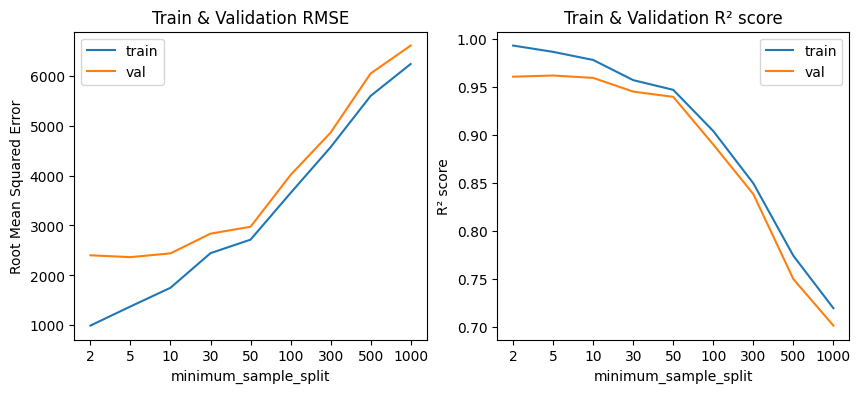

In [95]:
test_min_samples_splits = [2, 5, 10, 30, 50, 100, 300, 500, 1000]

find_best_condition(test_min_samples_splits, "minimum_sample_split", X_train_all, X_val_all, y_train, y_val)

### Analyze the test result of various minimum sample splits

- RMSE increase significantly after 50 minimum sample splits
- R² Score decrease dramatically afgter 50 minimum sample splits
- The gap of train and validation line plot is the closest when minimum sample splits = 50.

### Test various max depths

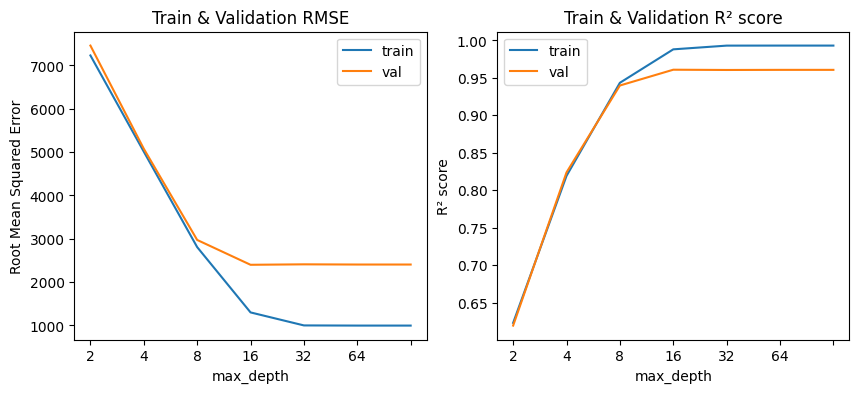

In [96]:
test_max_depth = [2, 4, 8, 16, 32, 64, None]

find_best_condition(test_max_depth, "max_depth", X_train_all, X_val_all, y_train, y_val)

### Analyze the test result of various max depths

- RMSE decreases after testing 8 max depths
- The gap of train and validation line plot's R² Score increase after 8 max depths


### Test various estimators

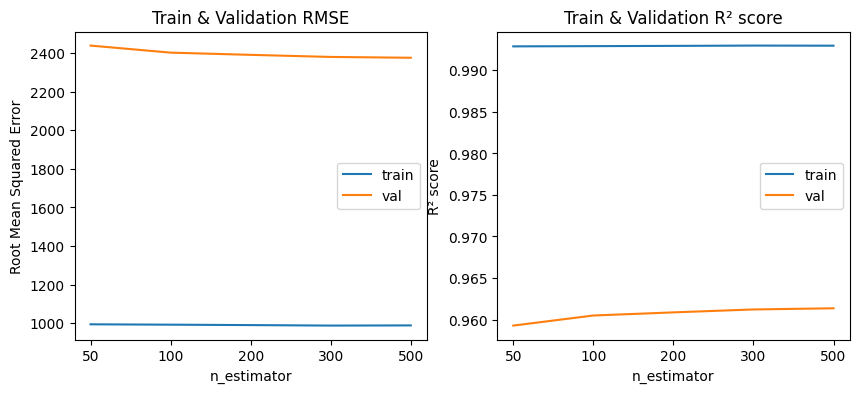

In [97]:
test_n_estimators = [50, 100, 200, 300, 500]

find_best_condition(test_n_estimators, "n_estimator", X_train_all, X_val_all, y_train, y_val)

### Analyze the test result of various n estimators
- Lowest RMSE and highest R² occurs when testing 500 estimators

### Final Result
The most optimal hyperparameters that resulted the lowest RMSE and the highest R² Score are as follows:
- `min_samples_splits`: 50
- `max_depth`: 8
- `n_estimators`: 500

These values provided the best balance between model accuracy and generalization on the validation set.

### Create a model with these optimal hyperparameters

Compare the mean of y_val and see if our RMSE is smaller that the mean of y_val.

In [98]:
best_model = RandomForestRegressor(n_estimators=500, min_samples_split=50, max_depth=8, random_state=RANDOM_STATE).fit(X_train_all, y_train)


y_pred_val = best_model.predict(X_val_all)
rmse_val = root_mean_squared_error(y_val, y_pred_val)

mean_target = np.mean(y_val)

r2_score_val = r2_score(y_val, y_pred_val)

print(f"RMSE_VAL: {rmse_val}")
print(f"R2_SCORE_VAL: {r2_score_val}")
print(f"MEAN OF Y_VAL: {mean_target}")

RMSE_VAL: 3361.077334047422
R2_SCORE_VAL: 0.922615717425622
MEAN OF Y_VAL: 24726.922871324932


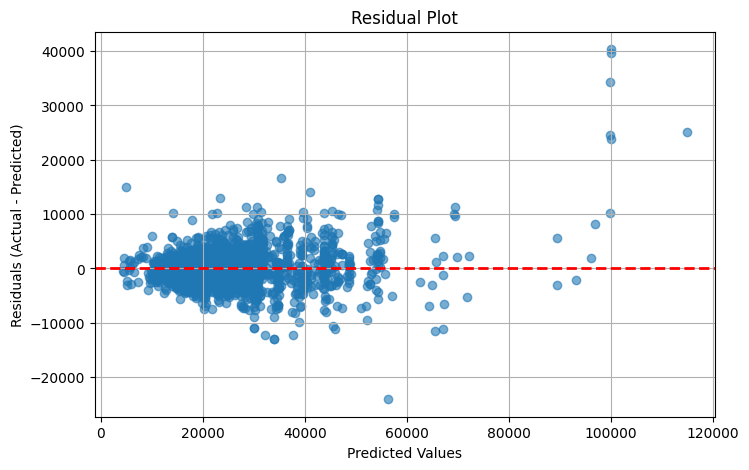

In [99]:
residuals = y_val - y_pred_val

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_val, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

### Analyze the model with using optimal hyperparameters

As a result, 
- the RMSE is roughly 14% of the mean of the target's validation set
- the R² Score of the target's validation set is nearly 1.0

Therefore, the model with using the most optimal hyperparameters creates accurate predictions.

### Try XGBRegressor

In [100]:
from xgboost import XGBRegressor


model = XGBRegressor(n_estimators=500, learning_rate=0.1, verbosity=1, random_state=RANDOM_STATE, early_stopping_rounds=10)
model.fit(
    X_train_all,
    y_train,
    eval_set=[(X_val_all, y_val)],
    verbose=True
)
print(model.best_iteration)
print(model.best_score)

[0]	validation_0-rmse:11065.23849


[1]	validation_0-rmse:10144.69177
[2]	validation_0-rmse:9357.41144
[3]	validation_0-rmse:8624.49065
[4]	validation_0-rmse:7982.76477
[5]	validation_0-rmse:7414.77734
[6]	validation_0-rmse:6891.72022
[7]	validation_0-rmse:6414.39756
[8]	validation_0-rmse:6009.24865
[9]	validation_0-rmse:5626.55851
[10]	validation_0-rmse:5290.59131
[11]	validation_0-rmse:4986.06666
[12]	validation_0-rmse:4722.17850
[13]	validation_0-rmse:4469.43070
[14]	validation_0-rmse:4249.10291
[15]	validation_0-rmse:4072.33143
[16]	validation_0-rmse:3897.16278
[17]	validation_0-rmse:3747.30823
[18]	validation_0-rmse:3613.76386
[19]	validation_0-rmse:3492.87455
[20]	validation_0-rmse:3385.80684
[21]	validation_0-rmse:3294.10379
[22]	validation_0-rmse:3201.24784
[23]	validation_0-rmse:3129.14587
[24]	validation_0-rmse:3053.56292
[25]	validation_0-rmse:2999.74702
[26]	validation_0-rmse:2941.89271
[27]	validation_0-rmse:2897.28458
[28]	validation_0-rmse:2859.27492
[29]	validation_0-rmse:2827.98962
[30]	validation_0-rmse

### Result of XGBRegressor

After setting n_estimators as 500, learning_rate as 0.1, with early_stopping_rounds as 10, the most lowest RMSE was 2139.6374675856678, on 265th round.